In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, confusion_matrix, auc

In [3]:
data = pd.read_csv('BigCitiesHealth.csv')

In [4]:
data.tail()

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_90_ci_low,value_90_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label
148287,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,New York City,NY,"New York City, NY",...,NaN,NaN,Northeast,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Both,NaN
148288,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Milwaukee,WI,"Milwaukee, WI",...,NaN,NaN,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Both,NaN
148289,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Houston,TX,"Houston, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both,NaN
148290,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Milwaukee,WI,"Milwaukee, WI",...,NaN,NaN,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both,NaN
148291,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Long Beach,CA,"Long Beach, CA",...,NaN,NaN,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both,NaN


In [5]:
data.dtypes

metric_item_label                   object
metric_cat_label                    object
metric_subcat_label                 object
metric_item_label_subtitle          object
metric_cat_item_yaxis_label         object
metric_source_desc_label_fn         object
metric_source_desc_label_url_fn     object
geo_label_city                      object
geo_label_state                     object
geo_label_citystate                 object
geo_fips_code                      float64
value                              float64
date_label                           int64
geo_label_proxy_or_real             object
geo_label_proxy_footnote            object
geo_fips_desc                       object
date_label_proxy_or_real            object
date_label_proxy_footnote           object
value_ci_flag_yesno                 object
value_95_ci_low                    float64
value_95_ci_high                   float64
value_90_ci_low                    float64
value_90_ci_high                   float64
geo_strata_

### Data Visualisation

In [6]:
data.nunique()

metric_item_label                    109
metric_cat_label                      11
metric_subcat_label                   33
metric_item_label_subtitle           109
metric_cat_item_yaxis_label           16
metric_source_desc_label_fn           12
metric_source_desc_label_url_fn       12
geo_label_city                        36
geo_label_state                       23
geo_label_citystate                   36
geo_fips_code                         35
value                              96698
date_label                            11
geo_label_proxy_or_real                2
geo_label_proxy_footnote               4
geo_fips_desc                          3
date_label_proxy_or_real               2
date_label_proxy_footnote              5
value_ci_flag_yesno                    2
value_95_ci_low                    85213
value_95_ci_high                   85458
value_90_ci_low                        0
value_90_ci_high                       0
geo_strata_region                      4
geo_strata_pover

NameError: name 'defd' is not defined

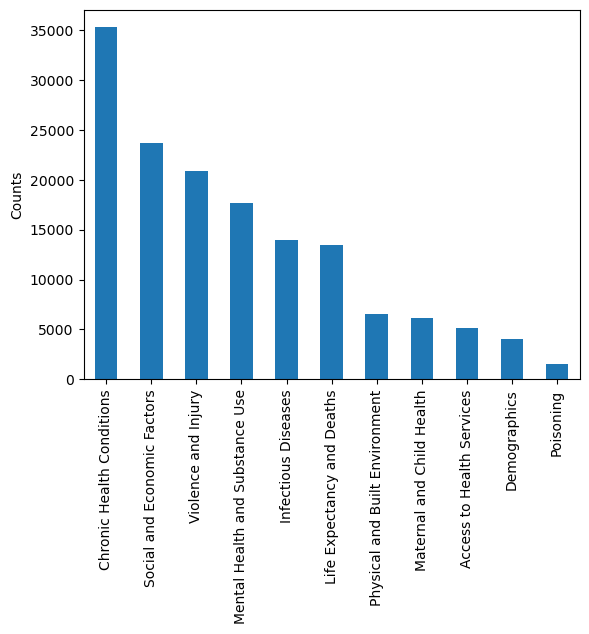

In [22]:
cat_counts = data['metric_cat_label'].value_counts()
cat_counts.plot.bar()
plt.ylabel('Counts')



Text(0, 0.5, 'Nmes')

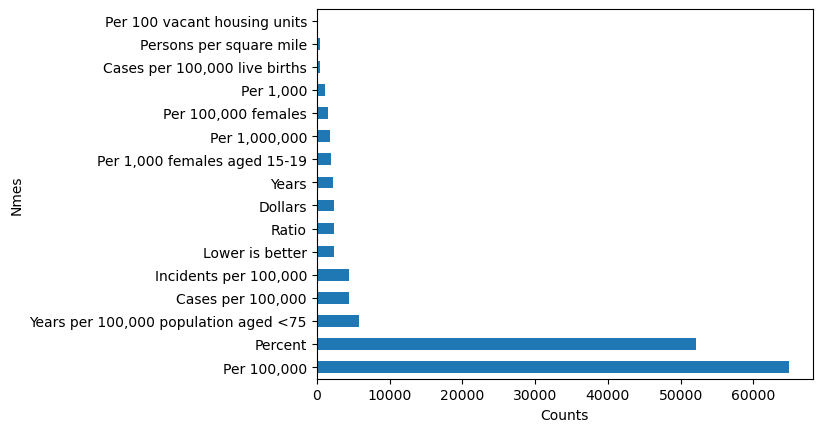

In [8]:
cat2_counts = data['metric_cat_item_yaxis_label'].value_counts()
axis = cat2_counts.plot.barh()
axis.set_xlabel('Counts')
axis.set_ylabel('Nmes')



Text(0, 0.5, 'Counts')

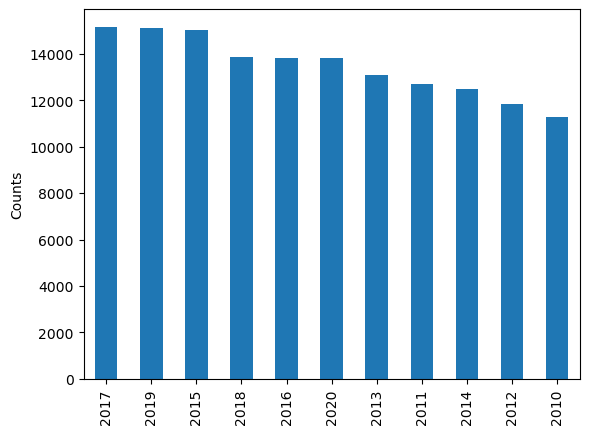

In [9]:
data['date_label'] = data['date_label'].astype(int)
date_counts = data['date_label'].value_counts()
date_counts.plot.bar()
plt.ylabel('Counts')

### Looking for Missing Values and Outliers
The numerical columns in our data are: 'value_95_ci_low' and 'value_95_ci_high'

In [10]:

missing_values = data.isnull().sum()
missing_values



metric_item_label                       0
metric_cat_label                        0
metric_subcat_label                     0
metric_item_label_subtitle              0
metric_cat_item_yaxis_label             0
metric_source_desc_label_fn             0
metric_source_desc_label_url_fn         0
geo_label_city                          0
geo_label_state                      1097
geo_label_citystate                     0
geo_fips_code                        1097
value                                 770
date_label                              0
geo_label_proxy_or_real                 0
geo_label_proxy_footnote           133002
geo_fips_desc                           0
date_label_proxy_or_real                0
date_label_proxy_footnote          104164
value_ci_flag_yesno                     0
value_95_ci_low                     54914
value_95_ci_high                    54904
value_90_ci_low                    148292
value_90_ci_high                   148292
geo_strata_region                 

In [11]:
len(data)

148292

We can see that the column with the most missing values is 'value_90_ci_low' and 'value_90_ci_high' where there is acutally no data at all. So we will delete these two columns. 

Therefore, delete the rows with missing values in these two columns.

In [12]:
#Deleting rows with missing values in 'value_95_ci_low' and 'value_95_ci_high'.
data = data.drop(['value_90_ci_low', 'value_90_ci_high'], axis=1)
data.isnull().sum()


metric_item_label                       0
metric_cat_label                        0
metric_subcat_label                     0
metric_item_label_subtitle              0
metric_cat_item_yaxis_label             0
metric_source_desc_label_fn             0
metric_source_desc_label_url_fn         0
geo_label_city                          0
geo_label_state                      1097
geo_label_citystate                     0
geo_fips_code                        1097
value                                 770
date_label                              0
geo_label_proxy_or_real                 0
geo_label_proxy_footnote           133002
geo_fips_desc                           0
date_label_proxy_or_real                0
date_label_proxy_footnote          104164
value_ci_flag_yesno                     0
value_95_ci_low                     54914
value_95_ci_high                    54904
geo_strata_region                    1097
geo_strata_poverty                   1097
geo_strata_Population             

To get an overview how much is still missing

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

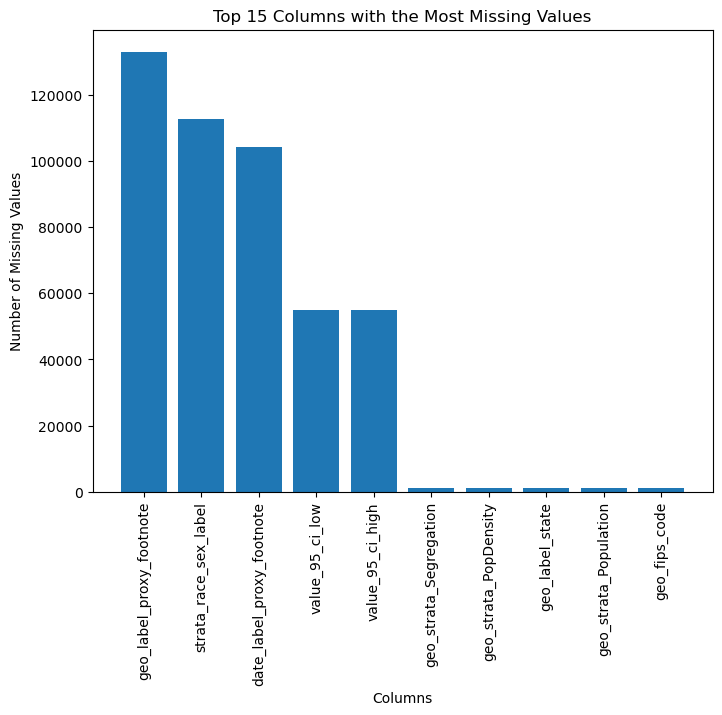

In [13]:
missing_values_count = data.isnull().sum()

sorted_columns = missing_values_count.sort_values(ascending=False)
top_15_columns = sorted_columns[:10]

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(top_15_columns.index, top_15_columns.values)
ax.set_title('Top 15 Columns with the Most Missing Values')
ax.set_xlabel('Columns')
ax.set_ylabel('Number of Missing Values')
plt.xticks(rotation=90)

In [14]:
data.describe()

,geo_fips_code,value,date_label,value_95_ci_low,value_95_ci_high
count,1.471950e+05,147522.000000,148292.000000,93378.000000,93388.000000
mean,2.880322e+06,830.377923,2015.227996,468.838106,568.740516
std,1.697827e+06,4304.120276,3.112534,1742.895189,2043.575501
min,4.550000e+05,-1.052184,2010.000000,-148.037039,0.458320
25%,8.200000e+05,10.851578,2013.000000,9.337966,15.449973
50%,2.938000e+06,26.743773,2015.000000,23.259248,34.061614
75%,4.748000e+06,77.161225,2018.000000,109.929802,149.434371
max,5.553000e+06,99408.000000,2020.000000,22650.600880,29193.761110


In [15]:
params_labels = {   'value' : 'Value', 
                    'value_95_ci_low': 'Value 95 Low', 
                    'value_95_ci_high': 'Value 95 High',
}

In [16]:
def parameters_boxplot(data: pd.DataFrame, parameters:params_labels):

    # Customize the colors of the boxes and whiskers
    color = {"boxes": "Black", "whiskers": "DarkBlue", "medians": "DarkOrange"}

    # Determine the number of rows and columns based on the number of parameters
    n_params = len(parameters)
    rows = (n_params + 1) // 2
    cols = min(n_params, 2)

    # Create a figure with the appropriate number of rows and columns
    fig, axes = plt.subplots(rows, cols, figsize=(14, 14))

    # Iterate over each parameter
    for i, (param, label) in enumerate(parameters.items()):
        
        # Determine the row and column index for the current parameter
        row = i // cols
        col = i % cols
        
        # Select the axis to plot the parameter
        ax = axes[row, col] if rows > 1 else axes[col]

        # Create the box plot for the current parameter
        data[[param]].plot.box(ax=ax, color=color, sym="r.").set(title=f'{label} box plot', ylabel='Value')

    # Return the created figure
    return fig

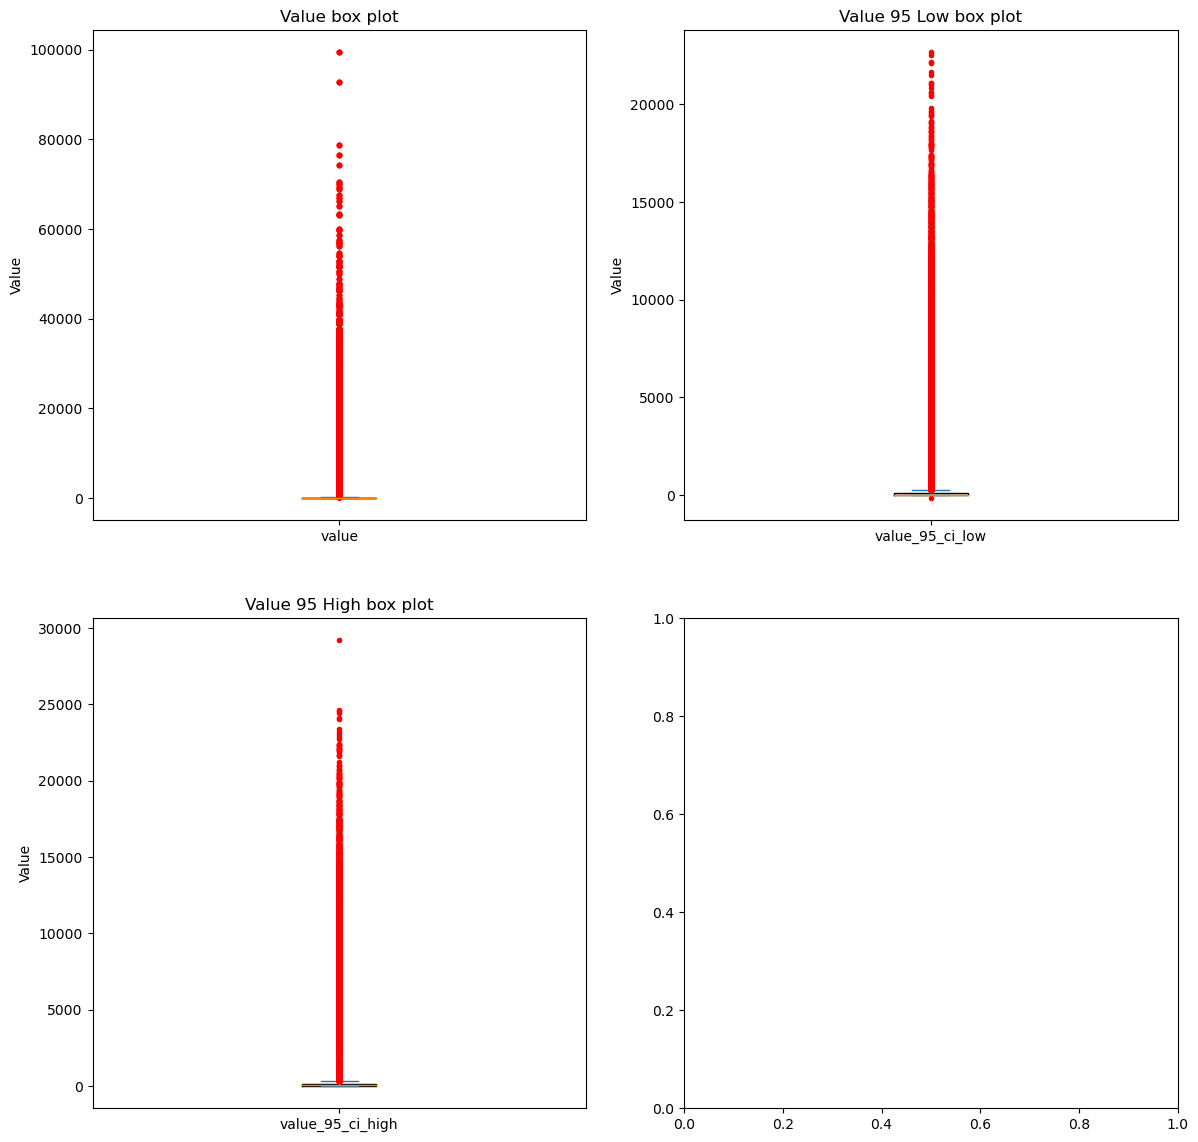

In [18]:
fig_params = parameters_boxplot(data, parameters = params_labels )


In [19]:
#Potential outliers
new_data = data.drop(['date_label'], axis=1)


new_data = new_data.loc[new_data['value_95_ci_high'] < 55]
new_data = new_data.loc[new_data['value_95_ci_low'] < 40]
new_data = new_data.loc[new_data['value'] < 60]

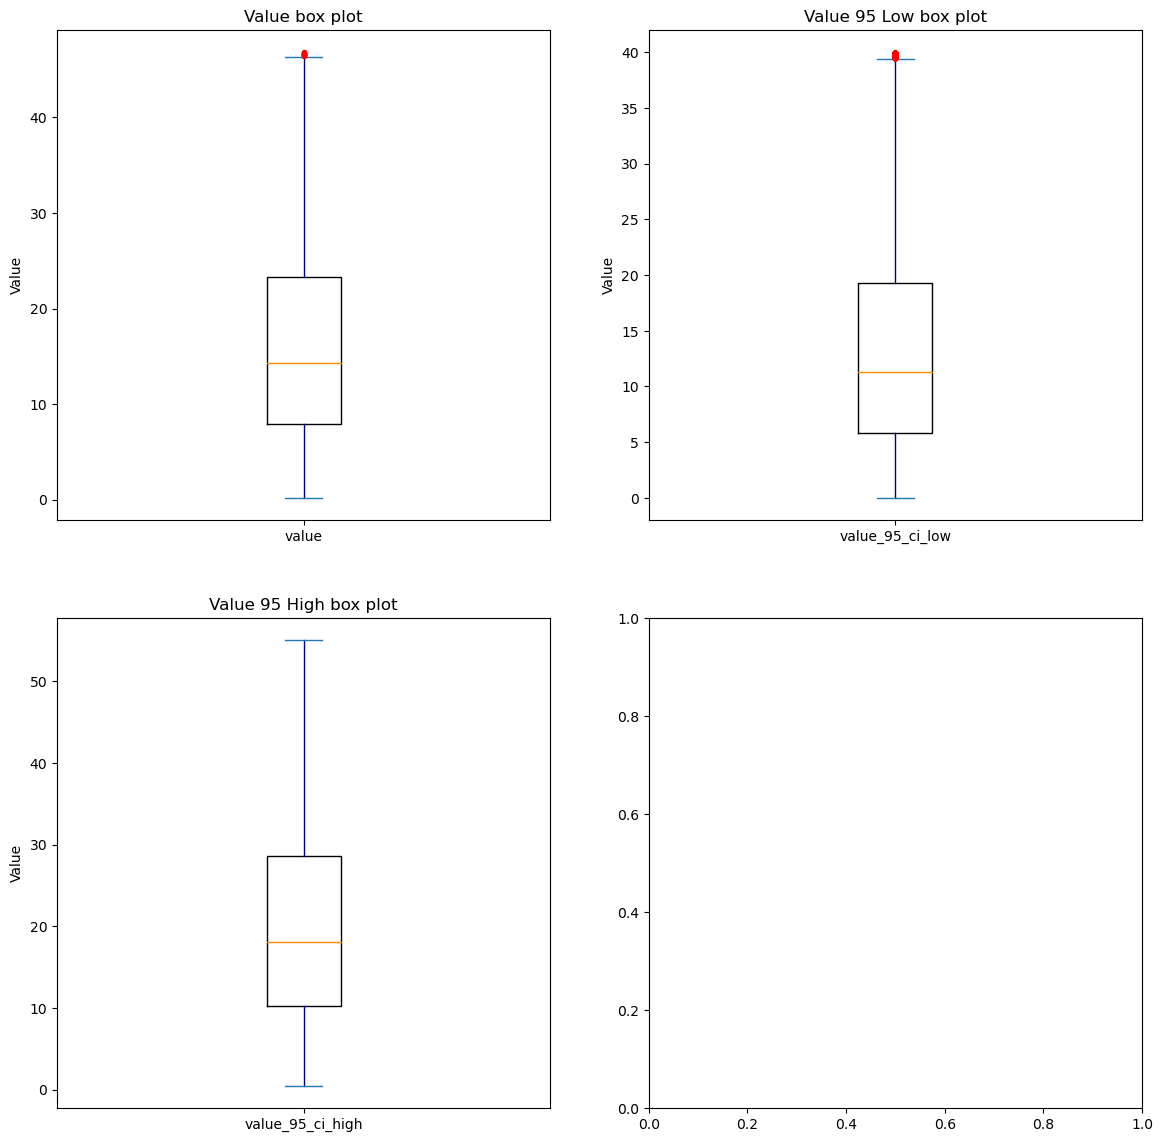

In [20]:
fig_params = parameters_boxplot(new_data, parameters = params_labels )


Text(0, 0.5, '')

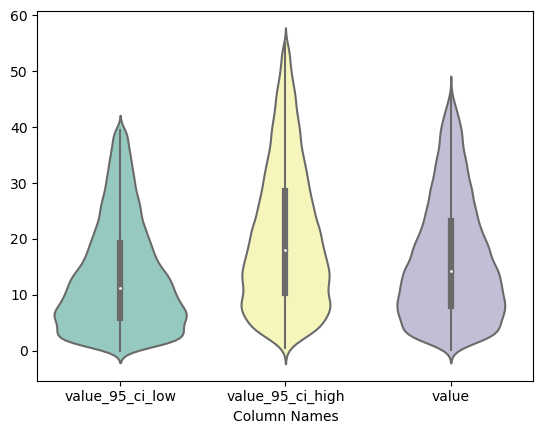

In [21]:
sns.violinplot(data=new_data[['value_95_ci_low', 'value_95_ci_high', 'value']], palette='Set3')
plt.xlabel('Column Names')
plt.ylabel('')